# Проект: 
# Определение перспективного тарифа для телеком-компании

<hr style="border: 2px solid green;" />

**Цель исследования**:

- Проанализировать поведение клиентов компании «Мегалайн» и сделать вывод — какой тариф лучше ( «Смарт» или «Ультра»)
 
**Задачи**: 
1. Провести исследовательский анализ данных: проанализировать структуру таблиц, типы данных, проверить на наличие аномалий, согласованность данных и т.д.;
2. Сделать предварительный анализ тарифов на небольшой выборке клиентов;
3. Проанализировать поведение клиентов и сделать вывод какой тариф лучше.

**Этапы выполнения проекта**:
 1. Знакомство с данными
 2. Предобработка данных
 3. Исследовательски анализ данных (EDA)
 4. Проверка гипотез
 5. Выводы
 
**Описание тарифов**
1. Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

2. Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**Описание данных**

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<hr style="border: 2px solid green;" />

### Итоги исследования

Наиболее оптимальным для пользователей выглядит тариф **smart**. 

В среднем, даже пользователи тарифа ultra по расходу минут и сообщений не превышают лимиты, определенные в smart. Т.е. пользователям ultra далеко не всегда требуется такое большое количество минут и сообщений. 
Кроме того, отток пользователей выше у тарифа ultra (10%).

Слабое место тарифа smart (с точки зрения пользователей) — это количество интернет-трафика. В тариф включен 15Гб, в то время как в среднем пользователи тратят 17Гб. А среди пользователей выборки у тарифа smart наибольшая доля относится к молодой возрастной группе (от 18 до 44 лет).

<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import math
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [315]:
calls = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\13_Определение_перспективного_тарифа\calls.csv')
internet = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\13_Определение_перспективного_тарифа\internet.csv', index_col=0) 
messages = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\13_Определение_перспективного_тарифа\messages.csv')
tariffs = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\13_Определение_перспективного_тарифа\tariffs.csv') 
users = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\13_Определение_перспективного_тарифа\users.csv')

In [316]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [317]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = [calls, internet, messages, tariffs, users]
names = ['calls', 'internet', 'messages', 'tariffs', 'users']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  CALLS_____________
 
 Вывод первых строк: 


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


None

 Подсчет доли пропусков в %: 


id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,202607,202607,1000_0,1
call_date,202607,365,2018-12-31,1435



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
duration,202607.00,6.76,5.84,0.00,1.30,6.00,10.70,38.00
user_id,202607.00,1253.94,144.72,1000.00,1126.00,1260.00,1379.00,1499.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  INTERNET_____________
 
 Вывод первых строк: 


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 22.2 MB


None

 Подсчет доли пропусков в %: 


id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,149396,149396,1000_0,1
session_date,149396,365,2018-12-31,1057



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
mb_used,149396.00,370.19,278.30,0.00,138.19,348.01,559.55,1724.83
user_id,149396.00,1252.10,144.05,1000.00,1130.00,1251.00,1380.00,1499.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  MESSAGES_____________
 
 Вывод первых строк: 


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.4 MB


None

 Подсчет доли пропусков в %: 


id             0.00
message_date   0.00
user_id        0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,123036,123036,1000_0,1
message_date,123036,364,2018-12-31,859



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
user_id,123036.00,1256.99,143.52,1000.00,1134.00,1271.00,1381.00,1499.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  TARIFFS_____________
 
 Вывод первых строк: 


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


None

 Подсчет доли пропусков в %: 


messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
tariff_name,2,2,smart,1



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
messages_included,2.00,525.00,671.75,50.00,287.50,525.00,762.50,1000.00
mb_per_month_included,2.00,23040.00,10861.16,15360.00,19200.00,23040.00,26880.00,30720.00
minutes_included,2.00,1750.00,1767.77,500.00,1125.00,1750.00,2375.00,3000.00
rub_monthly_fee,2.00,1250.00,989.95,550.00,900.00,1250.00,1600.00,1950.00
rub_per_gb,2.00,175.00,35.36,150.00,162.50,175.00,187.50,200.00
rub_per_message,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00
rub_per_minute,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  USERS_____________
 
 Вывод первых строк: 


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


None

 Подсчет доли пропусков в %: 


user_id       0.00
age           0.00
churn_date   92.40
city          0.00
first_name    0.00
last_name     0.00
reg_date      0.00
tariff        0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
churn_date,38,33,2018-12-03,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
user_id,500.00,1249.50,144.48,1000.00,1124.75,1249.50,1374.25,1499.00
age,500.00,46.59,16.67,18.00,32.00,46.00,62.00,75.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




In [318]:
print('Полные дубликаты в датасете users:', users.duplicated().any())
print('Полные дубликаты в датасете calls:', calls.duplicated().any())
print('Полные дубликаты в датасете messages:', messages.duplicated().any())
print('Полные дубликаты в датасете internet:', internet.duplicated().any())

Полные дубликаты в датасете users: False
Полные дубликаты в датасете calls: False
Полные дубликаты в датасете messages: False
Полные дубликаты в датасете internet: False


### Выводы:

- Предоставлены данных в пяти таблицах, которые содержат информацию о пользователях, тарифах, используемых минутах (звонках), сообщениях и гигабайт интернет-траффика. 
-Названия колонках во всех датафрейм корректное, в нижнем регистре, использован snake_case.
- Пропуски есть только в колонке churn_date (таблица users), но они не случайные, Nan в данном случае обозначает, что пользователь подключен к тарифу;
- Явные дубликаты везде отсутствуют;
- Часть колонок с датой имели тип object.


<hr style="border: 2px solid green;" />

## Этап 2: Предобработка данных

**Преобразование колонок с датой**

In [319]:
users['reg_date'] = pd.to_datetime(users['reg_date'], errors = 'coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors = 'coerce')
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

**Исследование датафрейма с данными о пользователях**

In [320]:
users['city'].value_counts().to_frame().reset_index().head(10)

,index,city
0,Москва,99
1,Санкт-Петербург,39
2,Новосибирск,16
3,Омск,14
4,Казань,14
5,Уфа,12
6,Краснодар,11
7,Набережные Челны,11
8,Ульяновск,11
9,Екатеринбург,11


In [321]:
users['tariff'].value_counts(normalize=True)

smart   0.70
ultra   0.30
Name: tariff, dtype: float64

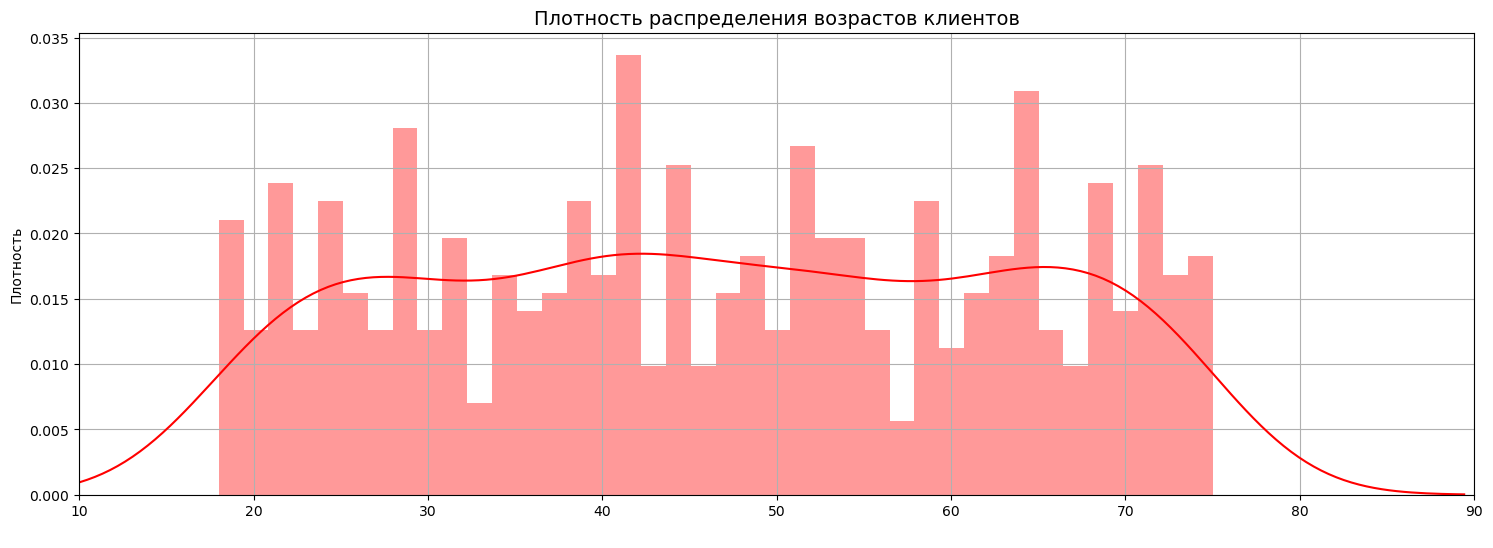

In [322]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(users['age'], bins=40, color="r")
plt.title('Плотность распределения возрастов клиентов', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(10, 90);

**Исследование датафрейма с данными о звонках**

In [323]:
# Добавим округление

calls['duration'] = np.ceil(calls['duration'])
calls.head(2)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000


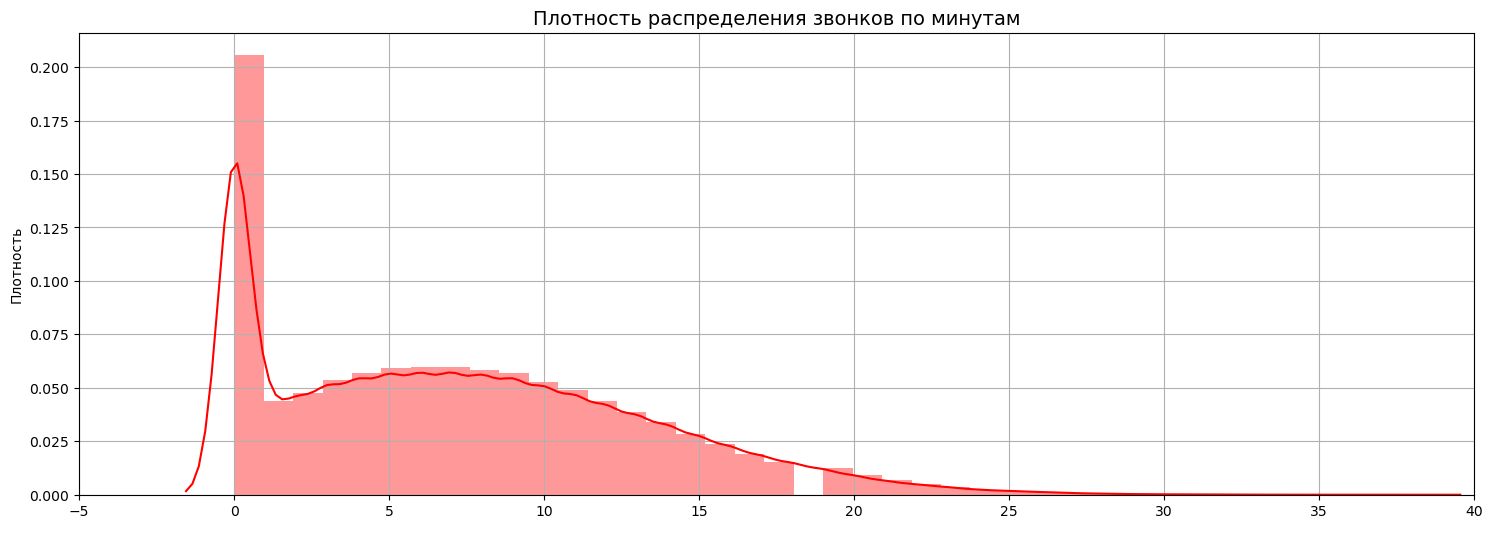

In [324]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(calls['duration'], bins=40, color="r")
plt.title('Плотность распределения звонков по минутам', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-5, 40);

**Исследование датафрейма с данными об интернет-сессиях**

In [325]:
# Добавляем округление до Гб в новую колонку
internet['GB_used'] = np.ceil(internet['mb_used'] / 1024)
internet.head(2)

,id,mb_used,session_date,user_id,GB_used
0,1000_0,112.95,2018-11-25,1000,1.00
1,1000_1,1052.81,2018-09-07,1000,2.00


In [326]:
internet.isna().any()

id              False
mb_used         False
session_date    False
user_id         False
GB_used         False
dtype: bool

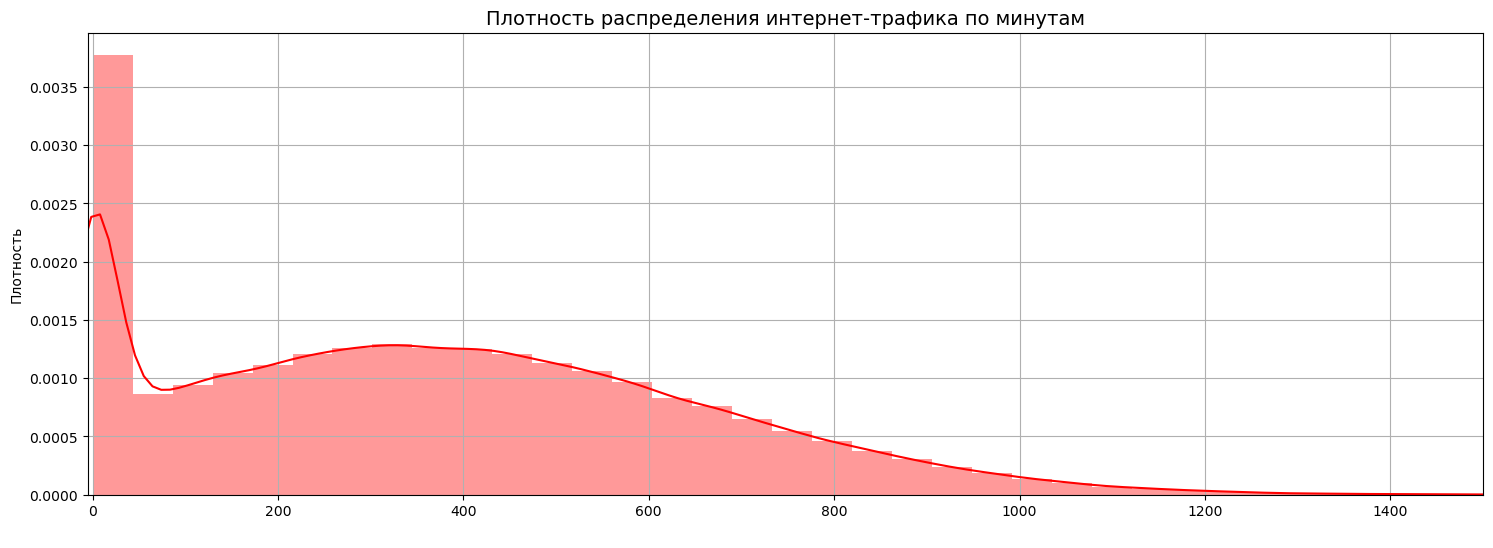

In [327]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(internet['mb_used'], bins=40, color="r")
plt.title('Плотность распределения интернет-трафика по минутам', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-5, 1500);

**Исследование датафрейма с данными о тарифах**

In [328]:
tariffs = (
    tariffs
    .rename(columns={'tariff_name':'tariff'})
)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Добавление данных и объединение таблиц**

In [329]:
users['reg_month'] = users['reg_date'].dt.month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [330]:
# Добавляем колонку с классификацией возрастной группы, согласно ВОЗ

def age_type(row):
    age = row['age']
    if 18 <= age <= 44 :
        return 'молодой'
    elif 45 <= age <= 59:
        return 'средний'
    elif 60 <= age <= 74:
        return 'пожилой'
    elif 75 <= age <= 89:
        return 'старческий'
    else:
        return 'не определено'

users['age_type'] = users.apply(age_type, axis=1)

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,age_type
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,средний
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,молодой
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,средний
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,молодой
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,пожилой


In [331]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам

calls_info = (
    calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration':'sum'})
    .reset_index()
    .rename(columns={'id':'calls_count', 'duration':'calls_duration'})
)
calls_info.head()

,user_id,month,calls_count,calls_duration
0,1000,5,22,159.00
1,1000,6,43,172.00
2,1000,7,47,340.00
3,1000,8,52,408.00
4,1000,9,58,466.00


In [332]:
# Количество отправленных сообщений по месяцам

messages_info = (
    messages.groupby(['user_id', 'month']).agg({'id':'count'})
    .reset_index()
    .rename(columns={'id':'messages_count'})
)
messages_info.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [333]:
# Объем израсходованного интернет-трафика по месяцам

internet_info = internet.groupby(['user_id', 'month']).agg({'GB_used':'sum', 'mb_used':'sum'}).reset_index()
internet_info.head()

,user_id,month,GB_used,mb_used
0,1000,5,4.00,2253.49
1,1000,6,49.00,23233.77
2,1000,7,28.00,14003.64
3,1000,8,27.00,14055.93
4,1000,9,26.00,14568.91


In [334]:
# Объединяем сгруппированные выше данные  

total_info = calls_info.merge(messages_info, on=['user_id', 'month'], how='outer')
total_info = total_info.merge(internet_info, on=['user_id', 'month'], how='outer')
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used
0,1000,5,22.00,159.00,22.00,4.00,2253.49
1,1000,6,43.00,172.00,60.00,49.00,23233.77
2,1000,7,47.00,340.00,75.00,28.00,14003.64
3,1000,8,52.00,408.00,81.00,27.00,14055.93
4,1000,9,58.00,466.00,57.00,26.00,14568.91


In [335]:
total_info = total_info.merge(users[['user_id', 'tariff', 'city']], on='user_id', how = 'left')
total_info = (
    total_info.merge(tariffs[['tariff', 'minutes_included', 'messages_included', 'mb_per_month_included', 'rub_monthly_fee']], on='tariff', how = 'left')
)

total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950


**Помесячная выручка с каждого пользователя по звонкам**

In [336]:
# Считаем сколько дополнительных минут использовал каждый пользователь
total_info['calls_duration'] = total_info['calls_duration'].fillna(0)
total_info['calls_extra_fee'] = total_info['calls_duration'] - total_info['minutes_included']
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,-2841.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,-2828.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,-2660.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,-2592.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,-2534.00


In [337]:
# Функции для подсчета выручки по звонкам, согласно тарифному плану

def user_calls(row):
    tariff = row['tariff']
    extra_fee = row['calls_extra_fee']
    if tariff == 'ultra':
        return extra_fee * 1
    else:
        return extra_fee * 3
    
total_info['calls_extra_fee'] = total_info.apply(user_calls, axis=1)    

# Если перерасхода нет, проставляем нули

def user_calls_update(row):
    extra_fee = row['calls_extra_fee']
    if extra_fee < 0:
        return 0
    else:
        return extra_fee
    
total_info['calls_extra_fee'] = total_info.apply(user_calls_update, axis=1)    
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00


In [338]:
# Общая сумма выручки со звонков, без учета ежемесячной платы по тарифу
total_info['calls_extra_fee'].sum()

278217.0

**Помесячная выручка с каждого пользователя за сообщения**

In [339]:
total_info['messages_extra_fee'] = total_info['messages_count'] - total_info['messages_included'] 
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee,messages_extra_fee
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00,-978.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00,-940.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00,-925.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00,-919.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00,-943.00


In [340]:
#функция для подсчета выручки по сообщениям

def user_messages(row):
    tariff = row['tariff']
    extra_fee = row['messages_extra_fee']
    if tariff == 'ultra':
        return extra_fee * 1
    else:
        return extra_fee * 3
    
total_info['messages_extra_fee'] = total_info.apply(user_messages, axis=1)    

# Если перерасхода нет, проставляем нули

def user_messages_update(row):
    extra_fee = row['messages_extra_fee']
    if extra_fee < 0:
        return 0
    else:
        return extra_fee
    
total_info['messages_extra_fee'] = total_info.apply(user_messages_update, axis=1)
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee,messages_extra_fee
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00


In [341]:
# Общая сумма выручки с сообщений, без учета ежемесячной платы по тарифу
total_info['messages_extra_fee'].sum()

38784.0

**Помесячная выручка с каждого пользователя за интернет-трафик**

In [342]:
#считаем сколько дополнительного интернет-трафика использовал каждый пользователь
#округляем значения до гигабайтов
total_info['internet_extra_fee_GB'] = (total_info['mb_used'] - total_info['mb_per_month_included']) / 1024
total_info['internet_extra_fee_GB'] = np.ceil(total_info['internet_extra_fee_GB'])
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee,messages_extra_fee,internet_extra_fee_GB
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,-27.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,-7.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,-16.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,-16.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,-15.00


In [343]:
# Функция для подсчета выручки по интернет-трафику

def user_internet(row):
    tariff = row['tariff']
    extra_fee = row['internet_extra_fee_GB']
    if tariff == 'ultra':
        return extra_fee * 150
    else:
        return extra_fee * 200
    
total_info['internet_extra_fee_GB'] = total_info.apply(user_internet, axis=1)  

# Если перерасхода нет, проставляем нули

def user_internet_update(row):
    extra_fee = row['internet_extra_fee_GB']
    if extra_fee < 0:
        return 0
    else:
        return extra_fee
    
total_info['internet_extra_fee_GB'] = total_info.apply(user_internet_update, axis=1)
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee,messages_extra_fee,internet_extra_fee_GB
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00


In [344]:
# Общая сумма выручки с доп. интернет-трафика, без учета ежемесячной платы по тарифу
total_info['internet_extra_fee_GB'].sum()

1450750.0

In [345]:
total_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3174 non-null   float64
 3   calls_duration         3214 non-null   float64
 4   messages_count         2717 non-null   float64
 5   GB_used                3203 non-null   float64
 6   mb_used                3203 non-null   float64
 7   tariff                 3214 non-null   object 
 8   city                   3214 non-null   object 
 9   minutes_included       3214 non-null   int64  
 10  messages_included      3214 non-null   int64  
 11  mb_per_month_included  3214 non-null   int64  
 12  rub_monthly_fee        3214 non-null   int64  
 13  calls_extra_fee        3214 non-null   float64
 14  messages_extra_fee     2717 non-null   float64
 15  inte

In [346]:
# Заполняем Nan

total_info['messages_count'] = total_info['messages_count'].fillna(0)
total_info['mb_used'] = total_info['mb_used'].fillna(0)
total_info['messages_extra_fee'] = total_info['messages_extra_fee'].fillna(0)
total_info['internet_extra_fee_GB'] = total_info['internet_extra_fee_GB'].fillna(0)

# Создаем колонку с итоговой суммой по каждому пользователю
total_info['total_profit'] = total_info['calls_extra_fee'] + total_info['messages_extra_fee'] + total_info['internet_extra_fee_GB'] + total_info['rub_monthly_fee']
total_info.head()

,user_id,month,calls_count,calls_duration,messages_count,GB_used,mb_used,tariff,city,minutes_included,messages_included,mb_per_month_included,rub_monthly_fee,calls_extra_fee,messages_extra_fee,internet_extra_fee_GB,total_profit
0,1000,5,22.00,159.00,22.00,4.00,2253.49,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00,1950.00
1,1000,6,43.00,172.00,60.00,49.00,23233.77,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00,1950.00
2,1000,7,47.00,340.00,75.00,28.00,14003.64,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00,1950.00
3,1000,8,52.00,408.00,81.00,27.00,14055.93,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00,1950.00
4,1000,9,58.00,466.00,57.00,26.00,14568.91,ultra,Краснодар,3000,1000,30720,1950,0.00,0.00,0.00,1950.00


In [347]:
total_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3174 non-null   float64
 3   calls_duration         3214 non-null   float64
 4   messages_count         3214 non-null   float64
 5   GB_used                3203 non-null   float64
 6   mb_used                3214 non-null   float64
 7   tariff                 3214 non-null   object 
 8   city                   3214 non-null   object 
 9   minutes_included       3214 non-null   int64  
 10  messages_included      3214 non-null   int64  
 11  mb_per_month_included  3214 non-null   int64  
 12  rub_monthly_fee        3214 non-null   int64  
 13  calls_extra_fee        3214 non-null   float64
 14  messages_extra_fee     3214 non-null   float64
 15  inte

In [348]:
# Общая сумма выручки с сообщений, без учета ежемесячной платы по тарифу
total_info['total_profit'].sum()

4914451.0

#### Выводы

- Для последующего анализа сгруппировали данные пользователей по месяцам (total_info);
- Для каждого пользователя в разрезе месяца посчитано количество сделанных звонков, израсходованных минут разговора, количество отправленных сообщений и объем израсходованного интернет-трафика. А также помесячную выручку с каждого пользователя.
- Выручка Мегалайна за исследуемый период составлет 4,854,065 руб.

<hr style="border: 2px solid green;" />

## Этап 3: Исследовательский анализ данных

**Задачи:**

- Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. Опишите распределения.

**Дополнительные задачи:**
- Расчет ср. длительности пользования тарифом, ultra vs smart по различным группам (объединение по месяцу, городу ...)
- Скорость оттока пользователей и связана она с тарифом
- Ускоряется ли отток клиентов
- Скорость подключения клиентов по городам (в каких городах быстрее)
- Кто чем больше пользуется — распределение по возрастным группам (молодежь интернетом, более старшее поколение - звонками)

In [349]:
# количество уникальных пользователей тарифа ultra и smart

user_count = (
    total_info.groupby('tariff').agg({'user_id':'nunique'}).reset_index()
)
user_count['share'] = user_count['user_id'] / user_count['user_id'].sum()
user_count

,tariff,user_id,share
0,smart,350,0.70
1,ultra,148,0.30


In [350]:
barchart_user_count = px.bar(
    data_frame=user_count,
    y="user_id",
    x="tariff",
    color="user_id",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='user_id',            
    hover_name='tariff',      
    labels={"user_id":"Количество пользователей", "tariff":"Тариф"},           
    title='Распределение уникальных пользователей по тарифам', 
    width=1000,                  
    height=400,                   
    template='seaborn',            
)
barchart_user_count

**Вывод к графику**

- В исследуемой выборке доля пользователей тарифа smart и ultra составляет 70% на 30%.

In [351]:
# Медианное количество минут, сообщений и интернет-трафика для каждого тарифа 
total_info.groupby(['tariff']).agg({'calls_duration':'median', 'messages_count':'median', 'mb_used': 'median'})

,calls_duration,messages_count,mb_used
tariff,,,
smart,422.00,28.00,16506.84
ultra,518.00,38.00,19308.01


In [352]:
pd.options.display.float_format = '{:,.2f}'.format

In [353]:
# Среднее количество минут, сообщений и интернет-трафика для каждого тарифа (добавлено)

total_info.groupby(['tariff']).agg({'calls_duration':'mean', 'messages_count':'mean', 'mb_used': 'mean', 'total_profit': 'mean'})

,calls_duration,messages_count,mb_used,total_profit
tariff,,,,
smart,417.93,33.38,"16,208.39","1,289.97"
ultra,526.62,49.36,"19,468.81","2,070.15"


In [354]:
# Средняя выручка с каждого тарифа и количество пользователей

total_profit_per_tafiff_median = (
    total_info.groupby(['tariff']).agg({'total_profit':'median', 'user_id' :'count'})
    .reset_index()
)
total_profit_per_tafiff_median['percent'] = (
    total_profit_per_tafiff_median['user_id'] / total_profit_per_tafiff_median['user_id'].sum()
)
total_profit_per_tafiff_median

,tariff,total_profit,user_id,percent
0,smart,"1,023.00",2229,0.69
1,ultra,"1,950.00",985,0.31


In [355]:
# Общая выручка с каждого тарифа

total_profit_per_tafiff = (
    total_info.groupby(['tariff']).agg({'total_profit':'sum'})
    .reset_index()
)
total_profit_per_tafiff['total_profit'] = np.ceil(total_profit_per_tafiff['total_profit'])
total_profit_per_tafiff['percent'] = total_profit_per_tafiff['total_profit'] / total_profit_per_tafiff['total_profit'].sum()
total_profit_per_tafiff

,tariff,total_profit,percent
0,smart,"2,875,351.00",0.59
1,ultra,"2,039,100.00",0.41


In [356]:
barchart_total_profit = px.bar(
    data_frame=total_profit_per_tafiff,
    y="total_profit",
    x="tariff",
    color="total_profit",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='total_profit',            
    hover_name='tariff',      
    labels={"total_profit":"Размер выручки в рублях", "tariff":"Тариф"},           
    title='Распределение размера выручки для каждого тарифа за исследуемый период', 
    width=1000,                  
    height=400,                   
    template='seaborn',            
)
barchart_total_profit

In [357]:
# Выручка с каждого тарифа по месяцам

total_profit_per_tafiff_month = total_info.groupby(['tariff', 'month']).agg({'total_profit':'sum'}).reset_index()
total_profit_per_tafiff_month['total_profit'] = np.ceil(total_profit_per_tafiff_month['total_profit'])
total_profit_per_tafiff_month['percent'] = total_profit_per_tafiff_month['total_profit'] / total_profit_per_tafiff['total_profit'].sum()
#total_profit_per_tafiff_month

In [358]:
barchart_total_profit = px.bar(
    data_frame=total_profit_per_tafiff_month,
    y="total_profit",
    x="month",
    color="tariff",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='total_profit',            
    hover_name='tariff',       
    labels={"total_profit":"Размер выручки в рублях", "tariff":"Тариф"},           
    title='Распределение размера выручки для каждого тарифа по месяцам за исследуемый период', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_total_profit

**Вывод к графику**

- Выручка с пользователей тарифа smart (выборка за исследуемый период) 59% против ~41% тарифа ultra.

**Дополнительные задачи**

- Расчет ср. длительности пользования тарифом, ultra vs smart по различным группам (объединение по месяцу, городу ...) +
- Скорость оттока пользователей и связана она с тарифом +
- Ускоряется ли отток клиентов +
- Скорость подключения клиентов по городам (в каких городах быстрее) +

In [359]:
print ('Количество клиентов, покинувших компанию за год', users.churn_date.notna().sum())

print ('Количество клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )

Количество клиентов, покинувших компанию за год 38
Количество клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35


In [360]:
users[users['churn_date'].notna()].head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,age_type
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,5,пожилой
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,10,средний
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,8,пожилой
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,6,молодой
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,5,молодой


In [361]:
# Формируем дф с данными пользователей, которые перестали использовать тариф

left_users = users.query('"2018-01-01" < churn_date < "2018-12-31"')
left_users['using_days'] = (left_users['churn_date'] - left_users['reg_date']).dt.days
left_users['churn_month'] = left_users['churn_date'].dt.month
left_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,age_type,using_days,churn_month
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,5,пожилой,142,10
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,10,средний,57,12
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,8,пожилой,87,11
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,6,молодой,109,10
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,5,молодой,139,10


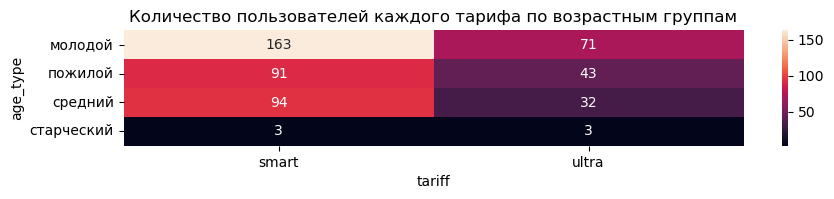

In [362]:
age_type_tariff = (
    users.pivot_table(index='age_type', columns='tariff', aggfunc='count', values='user_id')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(10, 1.5))
sns.heatmap(age_type_tariff, annot=True, fmt='d')
plt.title('Количество пользователей каждого тарифа по возрастным группам')
plt.show() 

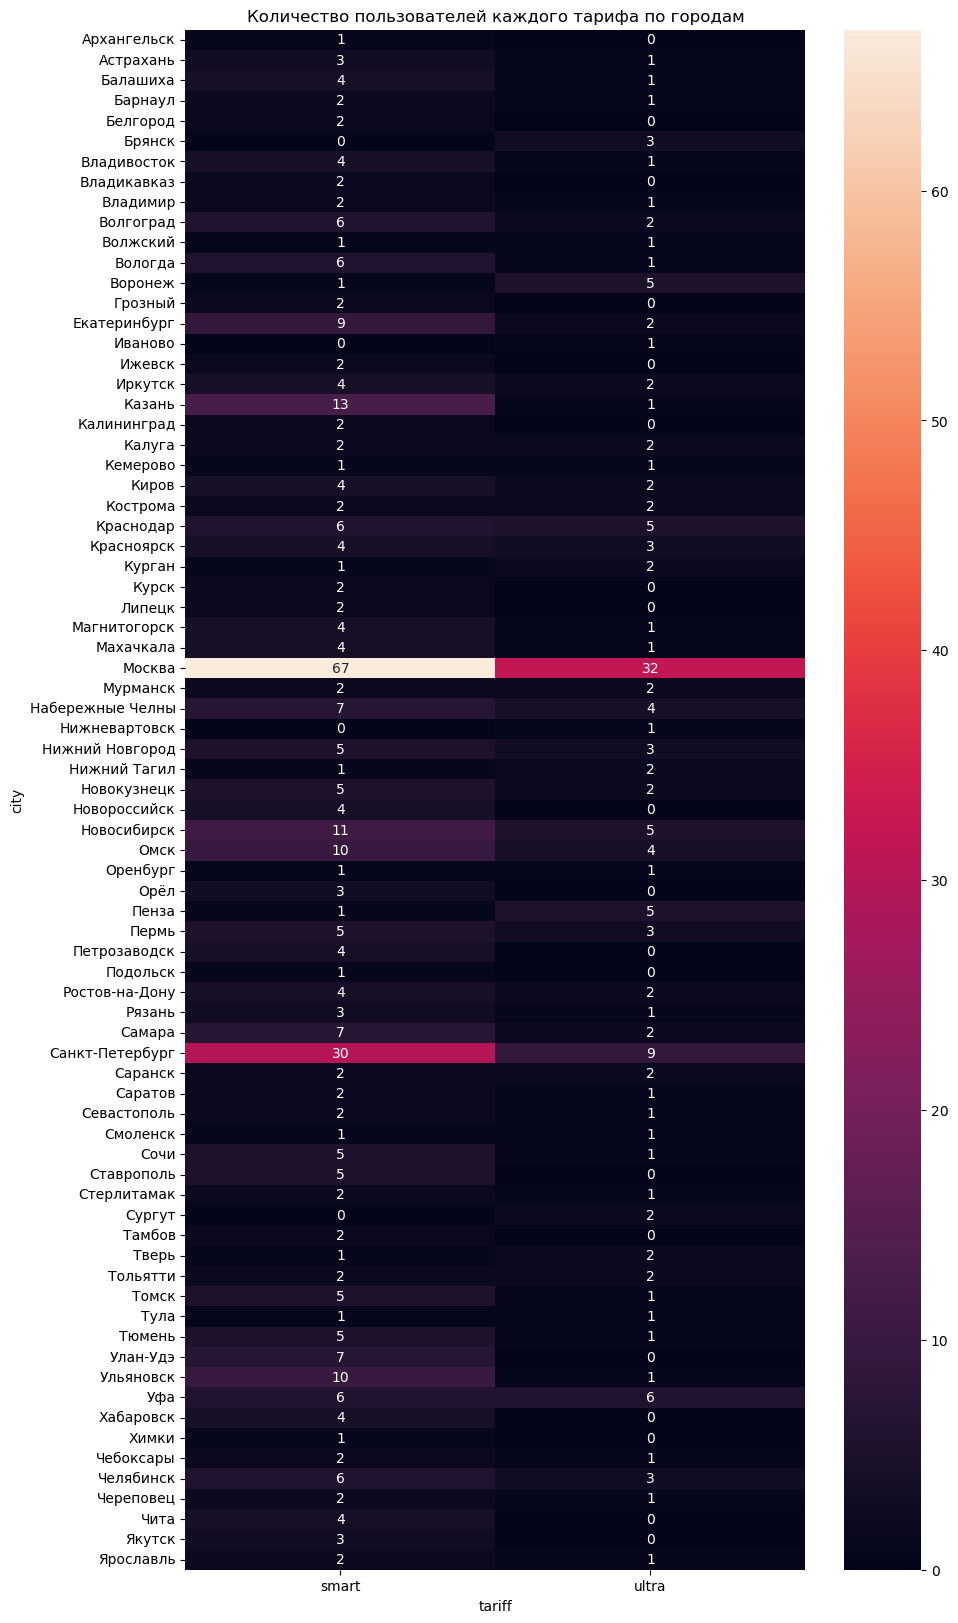

In [363]:
age_type_tariff = (
    users.pivot_table(index='city', columns='tariff', aggfunc='count', values='user_id')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(10, 20))
sns.heatmap(age_type_tariff, annot=True, fmt='d')
plt.title('Количество пользователей каждого тарифа по городам')
plt.show() 

**Расчет средней длительности пользования тарифом, ultra vs smart по различным группам**

In [364]:
print ('Минимальное количество дней пользования тарифом', left_users['using_days'].min(), 'дней')
print ('Максимальное количество дней пользования тарифом', left_users['using_days'].max(), 'дней')

Минимальное количество дней пользования тарифом 5 дней
Максимальное количество дней пользования тарифом 284 дней


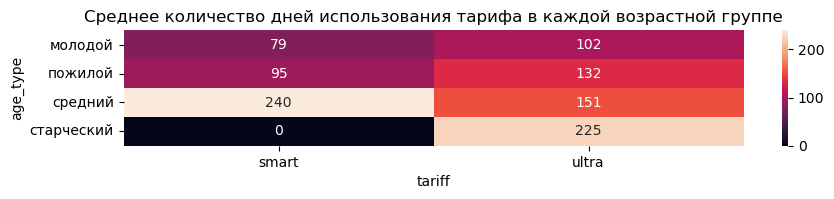

In [365]:
#среднее количество дней использования тарифа в каждой возрастной группе
age_type_tariff = (
    left_users.pivot_table(index='age_type', columns='tariff', aggfunc='median', values='using_days')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(10, 1.5))
sns.heatmap(age_type_tariff, annot=True, fmt='d')
plt.title('Cреднее количество дней использования тарифа в каждой возрастной группе')
plt.show() 

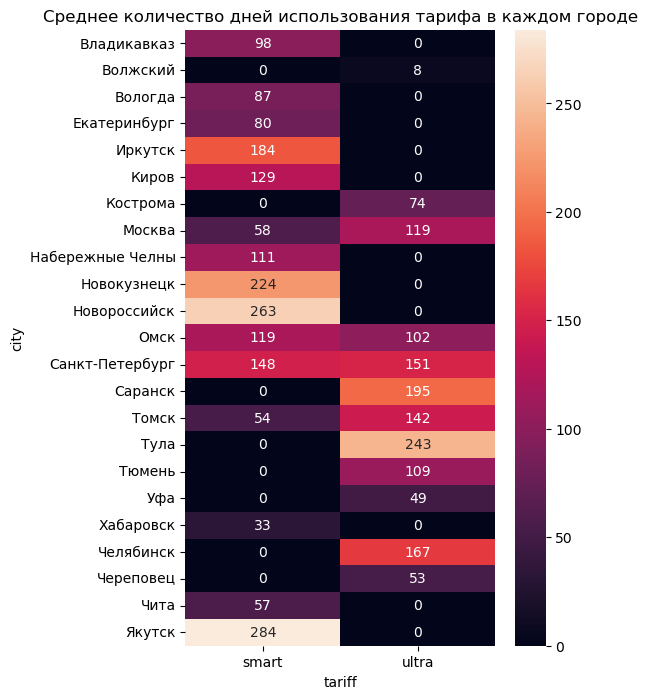

In [366]:
# Cреднее количество дней использования тарифа в каждом городе

age_type_tariff = (
    left_users.pivot_table(index='city', columns='tariff', aggfunc='median', values='using_days')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(5, 8))
sns.heatmap(age_type_tariff, annot=True, fmt='d')
plt.title('Cреднее количество дней использования тарифа в каждом городе')
plt.show() 

#### Выводы

По возрастной группе:
- В молодой возрастной группе (от 18 до 44) в среднем меньше всего дней используют оба тарифа;
- С среднем тариф smart дольше используют в средней возрастной группе (45-59 лет);
- С среднем тариф ultra дольше используют в старческой возрастной группе;

По городам:
- Наименьшее среднее количество дней использования тарифа smart в Хабаровске, Томске, Чите и Москве. Наибольшее в Якутске и Новороссийске;
- Наименьшее среднее количество дней использования тарифа ultra в Уфе и Череповце. Наибольшее в Туле;

**Скорость оттока пользователей (связана ли она с тарифом)**

In [367]:
left_users_count = left_users.groupby('tariff').agg({'user_id':'nunique'}).rename(columns={'user_id':'users_left_count'})
users_count = users.groupby('tariff').agg({'user_id':'nunique'}).rename(columns={'user_id':'users_total_count'})
users_count = users_count.merge(left_users_count, on='tariff' , how='left')
users_count['left_share_per_tariff'] = users_count['users_left_count'] / users_count['users_total_count']
users_count

,users_total_count,users_left_count,left_share_per_tariff
tariff,,,
smart,351,23,0.07
ultra,149,15,0.10


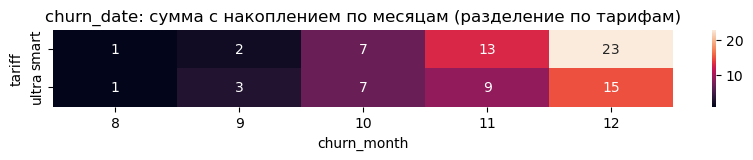

In [368]:
# Cумма с накоплением - количество пользователей, отказавшихся от тарифа

churn_data_cumsum = left_users.pivot_table(index='tariff', columns='churn_month', aggfunc='count', values='user_id').cumsum(axis=1)

plt.figure(figsize=(10, 1))
sns.heatmap(churn_data_cumsum, annot=True)
plt.title('churn_date: сумма с накоплением по месяцам (разделение по тарифам)')
plt.show() 

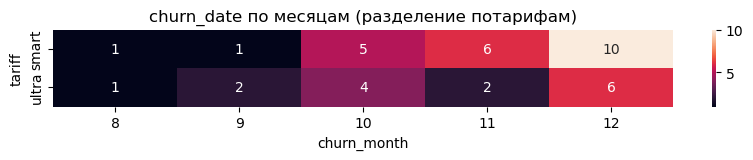

In [369]:
#количество пользователей, отказавшихся от тарифа (в каждом месяце)
churn_data = left_users.pivot_table(index='tariff', columns='churn_month', aggfunc='count', values='user_id')

plt.figure(figsize=(10, 1))
sns.heatmap(churn_data, annot=True)
plt.title('churn_date по месяцам (разделение потарифам)')
plt.show() 

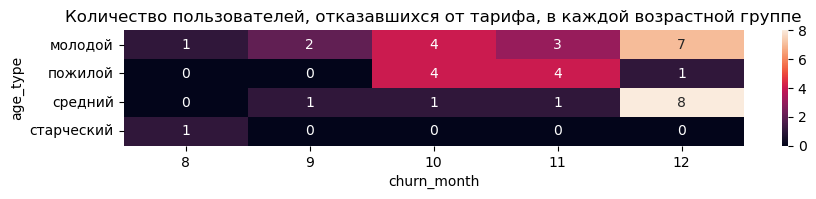

In [370]:
age_type_month = (
    left_users.pivot_table(index='age_type', columns='churn_month', aggfunc='count', values='user_id')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(10, 1.5))
sns.heatmap(age_type_month, annot=True, fmt='d')
plt.title('Количество пользователей, отказавшихся от тарифа, в каждой возрастной группе')
plt.show() 

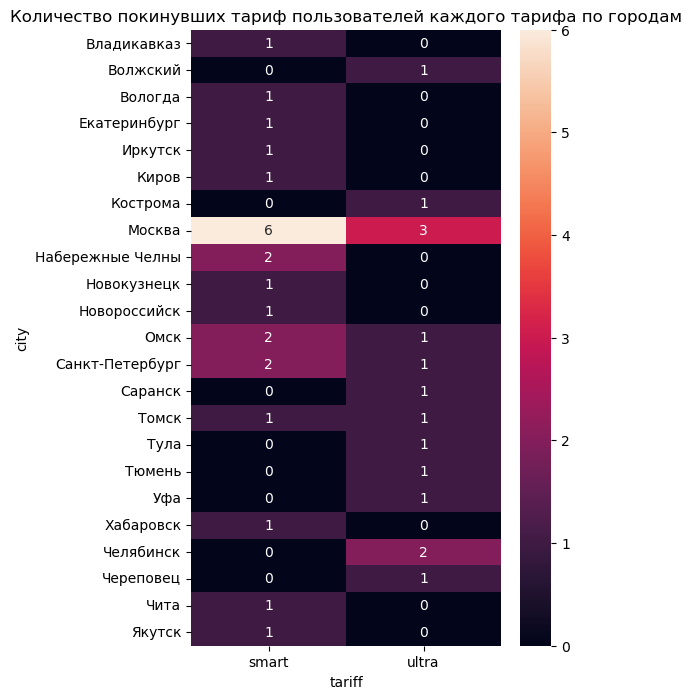

In [371]:
# Количество пользователей, отказавшихся от тарифа, в каждом городе

age_type_tariff = (
    left_users.pivot_table(index='city', columns='tariff', aggfunc='count', values='user_id')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(5, 8))
sns.heatmap(age_type_tariff, annot=True, fmt='d')
plt.title('Количество покинувших тариф пользователей каждого тарифа по городам')
plt.show() 

#### Выводы

- Количество клиентов, покинувших компанию за год, 38 пользователей;
- От использования тарифа smart отказались 23 пользователя против 15 отказавшихся от ultra;
- В процентном соотношении (от общего числа пользователей каждого тарифа) отток по тарифу ultra составляет 10%, в то время как от у smart 6%;
- Отток клиентов за пять месяцев с августа по декабрь, больше всего отказавшихся в декабре 2018;
- быстрее всего отток происходит в средней возрастной группе (от 45 до 59 лет);
- более динамичный (регулярный) отток у молодой возрастной группы (от 18 до 44 лет), т.е. эти пользователи быстрее принимают решение об отказе от тарифа. 

**Скорость подключения клиентов по городам (в каких городах быстрее)**

In [372]:
pd.crosstab(index=users['city'], columns=[users['reg_month']],
            margins=True).style.background_gradient(cmap='YlGn')

reg_month,1,2,3,4,5,6,7,8,9,10,11,12,All
city,,,,,,,,,,,,,
Архангельск,1,0,0,0,0,0,0,0,0,0,0,0,1
Астрахань,1,0,0,0,0,1,1,1,0,0,0,0,4
Балашиха,0,0,1,1,0,0,0,1,2,0,0,0,5
Барнаул,0,1,0,0,0,0,0,0,1,1,0,0,3
Белгород,0,0,0,0,1,1,0,0,0,0,0,0,2
Брянск,0,1,0,1,1,0,0,0,0,0,0,0,3
Владивосток,0,1,0,0,0,0,2,0,1,0,1,0,5
Владикавказ,0,0,0,0,0,0,1,0,0,1,0,0,2
Владимир,0,0,0,0,1,0,0,1,0,0,1,0,3


**Выводы**

- По итогам года быстрее всего подключаются:
 - в Москве (99 пользователей) и Санкт-Петербурге (39 пользователей);
 - Новосибирске (16 пользователей), Казани (14 пользователей) и Омске (14 пользователей).

**В каких городах чем больше пользуются**

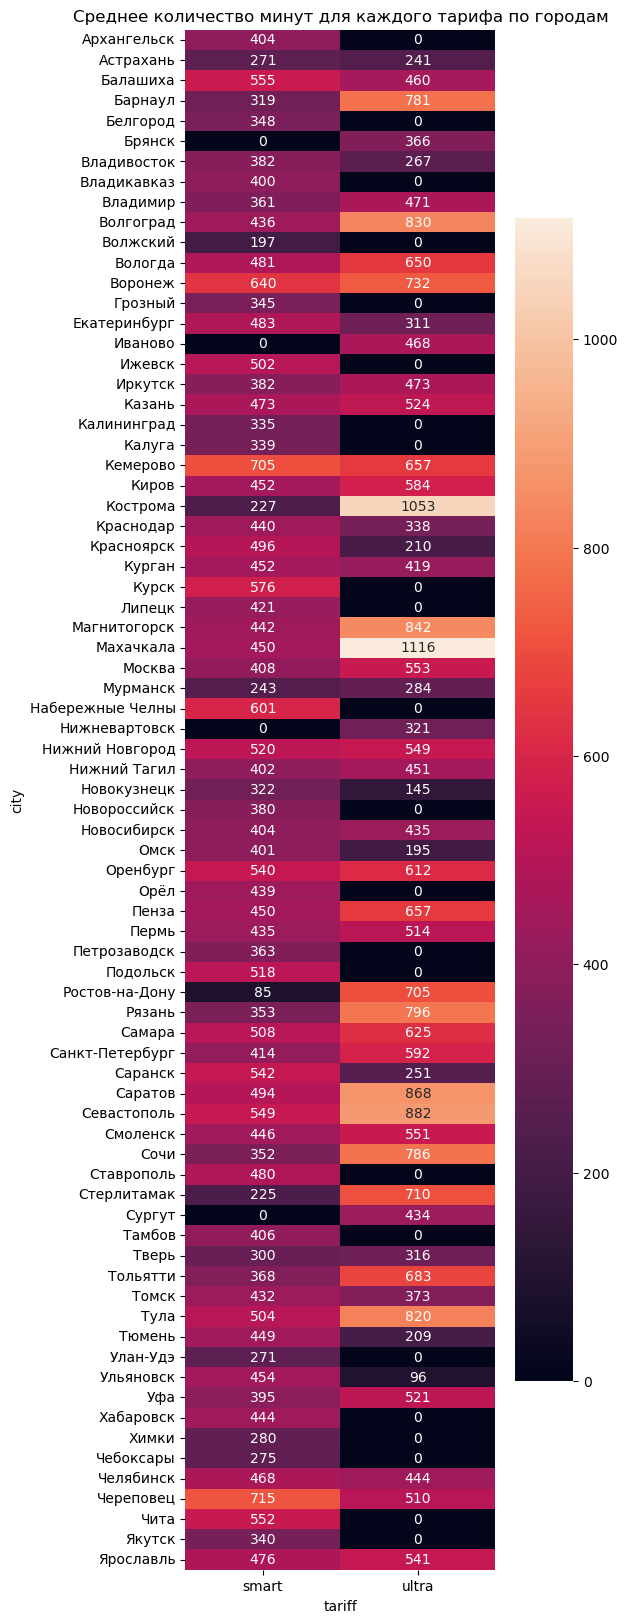

In [373]:
city_tariff_minutes = (
    total_info.pivot_table(index='city', columns='tariff', aggfunc='median', values='calls_duration')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(5, 20))
sns.heatmap(city_tariff_minutes, annot=True, fmt='d')
plt.title('Среднее количество минут для каждого тарифа по городам')
plt.show()

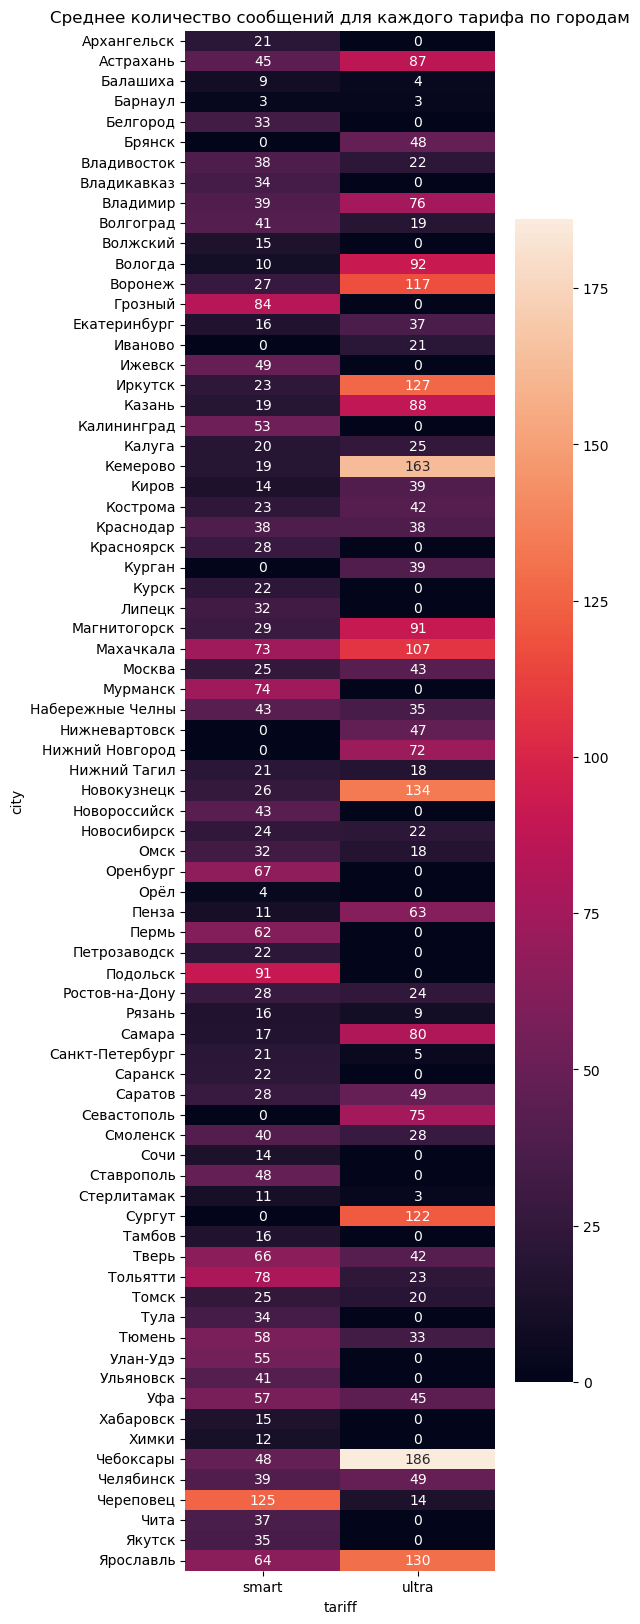

In [374]:
city_tariff_messages = (
    total_info.pivot_table(index='city', columns='tariff', aggfunc='median', values='messages_count')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(5, 20))
sns.heatmap(city_tariff_messages, annot=True, fmt='d')
plt.title('Среднее количество сообщений для каждого тарифа по городам')
plt.show() 

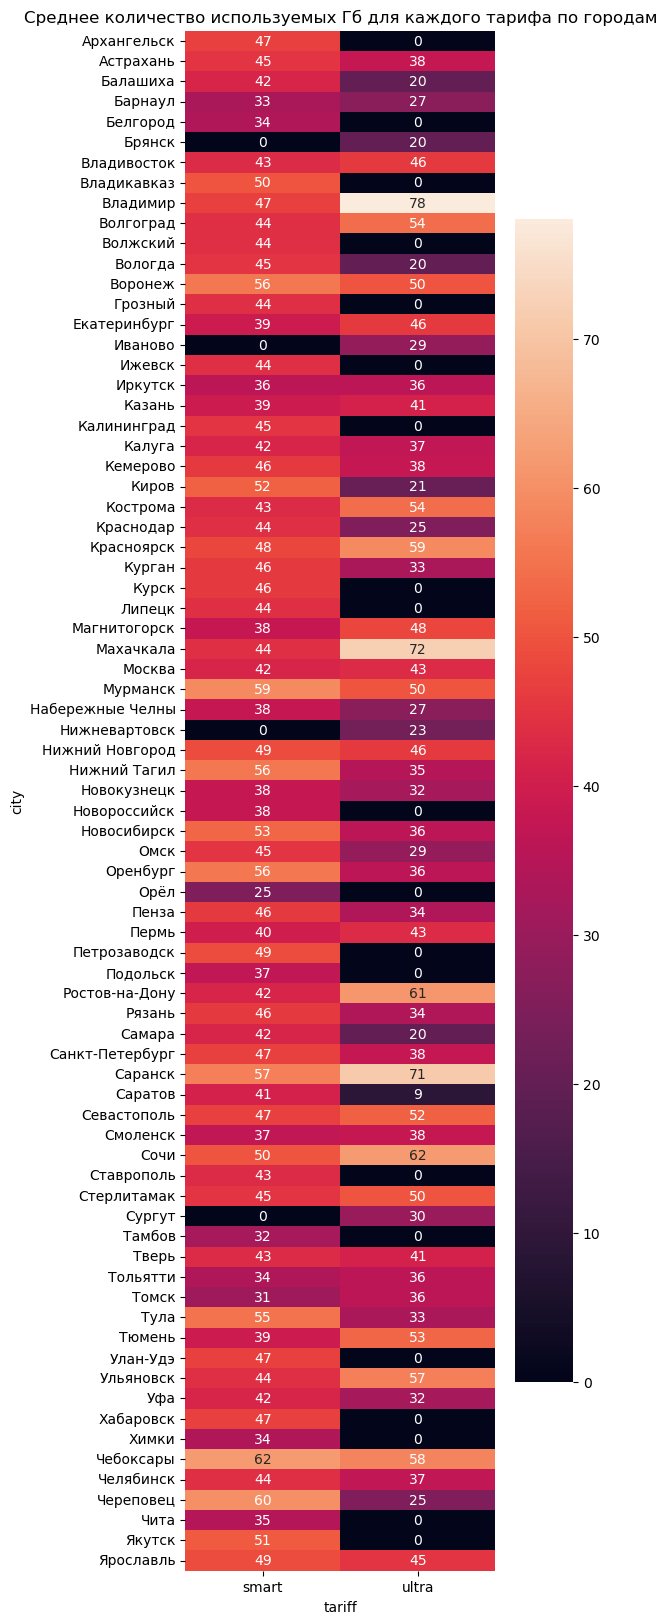

In [375]:
city_tariff_internet = (
    total_info.pivot_table(index='city', columns='tariff', aggfunc='median', values='GB_used')
    .fillna(0)
    .astype('int')
)

plt.figure(figsize=(5, 20))
sns.heatmap(city_tariff_internet, annot=True, fmt='d')
plt.title('Среднее количество используемых Гб для каждого тарифа по городам')
plt.show() 

**Пользователи тарифа smart**

In [376]:
# Cреднее количество минут, сообщений и интернет-трафика для тарифа smart по месяцам

smart = (
    total_info.groupby(['tariff', 'month']).agg({'calls_duration':'median', 'messages_count':'median', 'GB_used': 'median'})
    .query('tariff == "smart"').reset_index()
)
smart

,tariff,month,calls_duration,messages_count,GB_used
0,smart,1,162.50,15.00,19.00
1,smart,2,258.00,20.00,31.00
2,smart,3,409.00,23.00,41.00
3,smart,4,368.50,28.00,37.50
4,smart,5,433.00,30.00,43.00
5,smart,6,400.00,28.00,42.00
6,smart,7,414.00,29.00,43.00
7,smart,8,432.00,27.00,45.00
8,smart,9,435.00,30.00,42.00
9,smart,10,427.50,30.00,45.00


In [377]:
print('Медианное количество используемых минут у пользователей тарифа Смарт:', smart['calls_duration'].median())
print('Медианное количество используемых сообщений у пользователей тарифа Смарт:', smart['messages_count'].median())
print('Медианное количество используемого трафика у пользователей тарифа Смарт:', smart['GB_used'].median())

Медианное количество используемых минут у пользователей тарифа Смарт: 420.75
Медианное количество используемых сообщений у пользователей тарифа Смарт: 28.0
Медианное количество используемого трафика у пользователей тарифа Смарт: 42.5


In [378]:
def month(row):
    month = row['month']
    if month == 1:
        return 'Январь'
    elif month == 2:
        return 'Февраль'
    elif month == 3:
        return 'Март'
    elif month == 4:
        return 'Апрель'
    elif month == 5:
        return 'Май'
    elif month == 6:
        return 'Июнь'
    elif month == 7:
        return 'Июль'
    elif month == 8:
        return 'Август'
    elif month == 9:
        return 'Сентябрь'
    elif month == 10:
        return 'Октябрь'
    elif month == 11:
        return 'Ноябрь'
    elif month == 12:
        return 'Декабрь'
    else:
        return
    
smart['month'] = smart.apply(month, axis=1)
#smart

In [379]:
# Функция визуализации

def barchart_visualisation(df, dimensions, dimensions_2, text, hover_name, labels, title):
    barchart = px.bar(
    data_frame=df,
    x=df[dimensions],
    y=df[dimensions_2],
    color=df[dimensions_2],
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',           
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text=text,            
    hover_name=hover_name,      
    labels={"calls_duration":"Количество минут", "month":"Месяц"},           
    title=title, 
    width=1000,                  
    height=400,                   
    template='seaborn'          
)
    return barchart

barchart_smart_calls = (
    barchart_visualisation(smart, dimensions='month', dimensions_2='calls_duration', 
                           text='calls_duration',
                           hover_name='month',  
                           labels={"calls_duration":"Количество минут", "month":"Месяц"},
                           title='Среднее количество минут в месяц у пользователей тарифа smart')
)
barchart_smart_calls

In [380]:
barchart_smart_message = (
    barchart_visualisation(smart, dimensions='month', dimensions_2='messages_count', 
                           text='messages_count',
                           hover_name='month',  
                           labels={"messages_count":"Количество сообщений", "month":"Месяц"},
                           title='Среднее количество сообщений в месяц у пользователей тарифа smart')
)
barchart_smart_message

In [381]:
barchart_smart_internet = (
    barchart_visualisation(smart, dimensions='month', dimensions_2='GB_used', 
                           text='GB_used',
                           hover_name='month',  
                           labels={"GB_used":"Количество гигабайт", "month":"Месяц"},
                           title='Среднее количество мегабайт в месяц у пользователей тарифа smart')
)
barchart_smart_internet

#### Выводы

Пользователи тарифа smart в среднем (среднее от среднего ежемесячного) тратят в месяц:
- 397.0 минут на звонки,
- 28 сообщений,
- 17 Гб трафика.

Распределение по месяцам неравномерное:
- в мае и в период с августа по декабрь расходуют больше 400 минут в месяц (пик в декабре: 446.5 минут), а в январе самые низкие значения (в среднем 156.5 минут);
- с апреля по декабрь пользователи расходуют от 28 до 30 сообщений в месяц, больше всего в мае, сентябре и октябре. В январе в среднем всего 15 сообщений.
- с мая по декабрь расходуют в среднем около 16055.5 мегабайт трафика. С октября по декабрь самый большой расход - более 17000 мегабайт в месяц. А в январе всего 7097 мегабайт. 

**Пользователи тарифа ultra**

In [382]:
# Cреднее количество минут, сообщений и интернет-трафика для тарифа ultra по месяцам

ultra = (
    total_info.groupby(['tariff', 'month']).agg({'calls_duration':'median', 'messages_count':'median', 'GB_used': 'median'})
    .query('tariff == "ultra"').reset_index()
)
ultra['month'] = ultra.apply(month, axis=1)
#ultra['mb_used'] = np.ceil(ultra['mb_used'])
ultra

,tariff,month,calls_duration,messages_count,GB_used
0,ultra,Январь,382.00,32.00,31.00
1,ultra,Февраль,168.00,5.50,21.00
2,ultra,Март,403.00,20.00,36.00
3,ultra,Апрель,453.00,17.00,34.00
4,ultra,Май,519.00,25.00,38.00
5,ultra,Июнь,479.00,27.50,37.00
6,ultra,Июль,542.00,38.00,39.00
7,ultra,Август,500.00,40.00,37.00
8,ultra,Сентябрь,520.00,43.00,38.50
9,ultra,Октябрь,533.00,49.00,39.00


In [383]:
print('Медианное количество используемых минут у пользователей тарифа Ультра:', ultra['calls_duration'].median())
print('Медианное количество используемых сообщений у пользователей тарифа Ультра:', ultra['messages_count'].median())
print('Медианное количество используемого трафика у пользователей тарифа Ультра:', ultra['GB_used'].median())

Медианное количество используемых минут у пользователей тарифа Ультра: 509.5
Медианное количество используемых сообщений у пользователей тарифа Ультра: 35.0
Медианное количество используемого трафика у пользователей тарифа Ультра: 37.5


In [384]:
barchart_ultra_calls = (
    barchart_visualisation(ultra, dimensions='month', dimensions_2='calls_duration', 
                           text='calls_duration',
                           hover_name='month',  
                           labels={"calls_duration":"Количество минут", "month":"Месяц"},
                           title='Среднее количество минут в месяц у пользователей тарифа ultra')
)
barchart_ultra_calls

In [385]:
barchart_ultra_messages = (
    barchart_visualisation(ultra, dimensions='month', dimensions_2='messages_count', 
                           text='messages_count',
                           hover_name='month',  
                           labels={"messages_count":"Количество сообщений", "month":"Месяц"},
                           title='Среднее количество сообщений в месяц у пользователей тарифа ultra')
)
barchart_ultra_messages

In [386]:
barchart_ultra_internet = (
    barchart_visualisation(ultra, dimensions='month', dimensions_2='GB_used', 
                           text='GB_used',
                           hover_name='month',  
                           labels={"GB_used":"Количество гигабайт", "month":"Месяц"},
                           title='Среднее количество гигабайт в месяц у пользователей тарифа ultra')
)
barchart_ultra_internet

#### Выводы

Пользователи тарифа ultra в среднем тратят в месяц:
- 493.0 минут на звонки,
- 34.5 сообщений,
- 19.5 Гб трафика.

Распределение по месяцам неравномерное:
- в июле, октябре и декабрь расходуют больше 500 минут в месяц (пик в декабре: 558.5 минут), а в феврале самые низкие значения (в среднем 157 минут). У пользователей тарифа smart самые низкие показатели в январе;
- с июля по декабрь пользователи расходуют от 39 до 52 сообщений в месяц, больше всего в октябре и декабре. Интересно, что с февраля по июнь расход сообщений у пользователей ultra меньше, чем у пользователей тарифа smart. Самые низкие показатели в феврале (всего 5 сообщений).
- с марта по декабрь колебания в целом незначительные. Самые низкие показатели в феврале, всего 7328 мегабайт.

Интересно, что в феврале у пользователей тарифа ultra по всем пунктам наблюдается низкие средние значения.

### Тариф ULTRA
#### Звонки: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [387]:
tariff_ultra = total_info.query('tariff == "ultra"')

In [388]:
ultra_calls_duration_mean = tariff_ultra['calls_duration'].mean()
ultra_calls_duration_mean

526.6233502538071

In [389]:
#медиана
ultra_calls_duration_median = tariff_ultra['calls_duration'].median()

#дисперсия по выборке
variance_estimate_ultra_calls = np.var(tariff_ultra['calls_duration'], ddof=1)

#стандартное отклонение по выборке
standard_deviation_ultra_calls = np.std(tariff_ultra['calls_duration'], ddof=1)

display('Среднее значение (медиана)', ultra_calls_duration_median)
display('Дисперсия по выборке', variance_estimate_ultra_calls)
display('Стандартное отклонение по выборке', standard_deviation_ultra_calls)

'Среднее значение (медиана)'

518.0

'Дисперсия по выборке'

100873.63339730089

'Стандартное отклонение по выборке'

317.60609785912624

In [390]:
tariff_ultra['calls_duration'].describe()

count     985.00
mean      526.62
std       317.61
min         0.00
25%       284.00
50%       518.00
75%       752.00
max     1,673.00
Name: calls_duration, dtype: float64

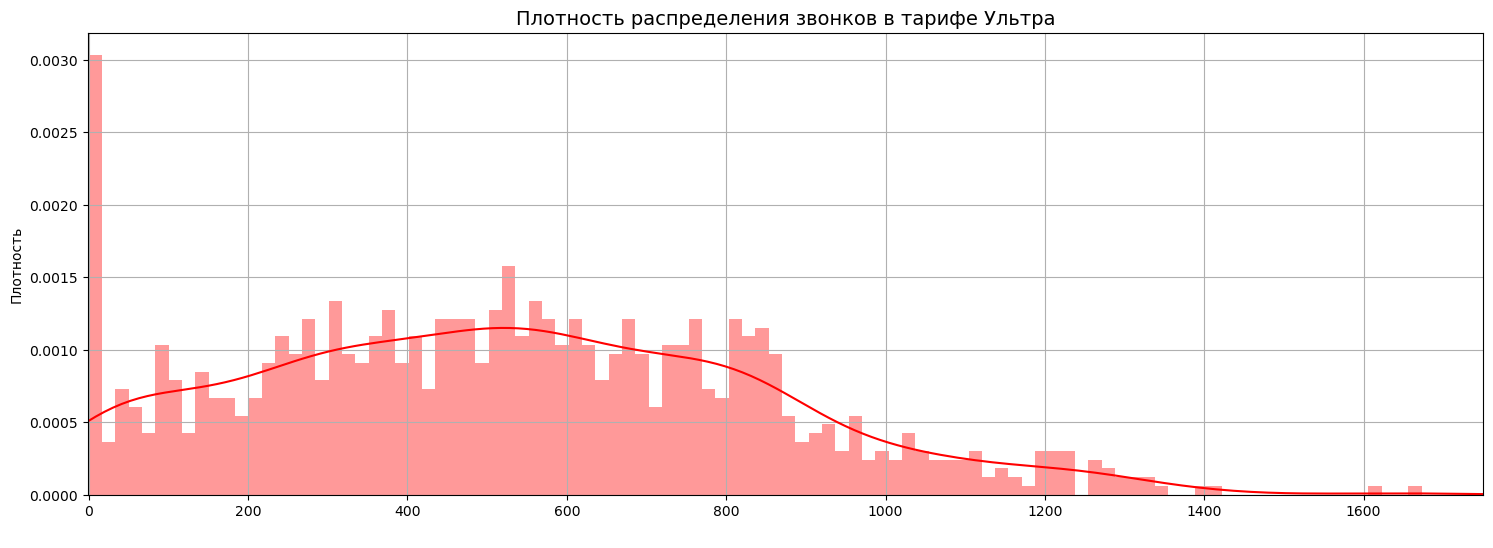

In [391]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(tariff_ultra['calls_duration'], bins=100, color="r")
plt.title('Плотность распределения звонков в тарифе Ультра', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-1, 1750);

####  Сообщения: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [392]:
#медиана
ultra_messages_median = tariff_ultra['messages_count'].median()

#дисперсия по выборке
ultra_variance_estimate_message = np.var(tariff_ultra['messages_count'], ddof=1)

#стандартное отклонение по выборке
ultra_standard_deviation_message = np.std(tariff_ultra['messages_count'], ddof=1)

display('Среднее значение (медиана)', ultra_messages_median)
display('Дисперсия по выборке', ultra_variance_estimate_message)
display('Стандартное отклонение по выборке', ultra_standard_deviation_message)

'Среднее значение (медиана)'

38.0

'Дисперсия по выборке'

2285.2661425446818

'Стандартное отклонение по выборке'

47.8044573501748

In [393]:
tariff_ultra['messages_count'].describe()

count   985.00
mean     49.36
std      47.80
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: messages_count, dtype: float64

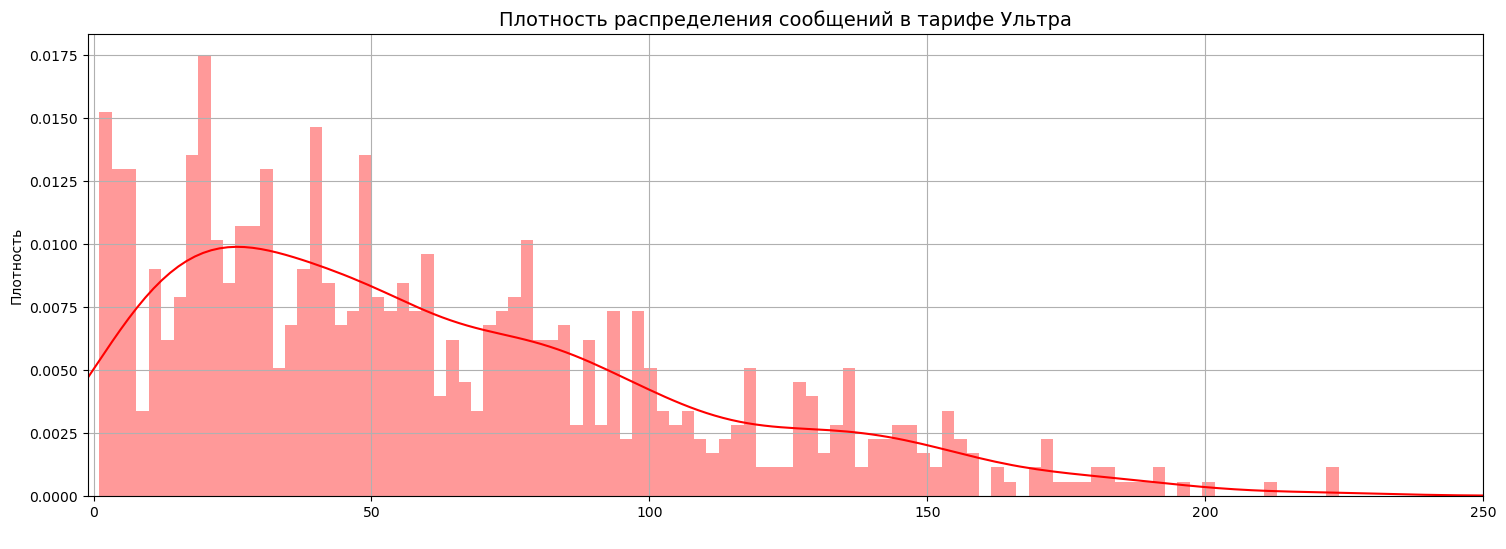

In [394]:
# Исключаем нулевые значения
tariff_ultra_test = tariff_ultra.query('messages_count != 0.0')

plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(tariff_ultra_test['messages_count'], bins=100, color="r")
plt.title('Плотность распределения сообщений в тарифе Ультра', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-1, 250);

In [395]:
tariff_ultra_test['messages_count'].describe()

count   795.00
mean     61.16
std      45.93
min       1.00
25%      24.00
50%      51.00
75%      87.50
max     224.00
Name: messages_count, dtype: float64

#### Интернет-трафик: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [396]:
#медиана
ultra_internet_median = tariff_ultra['GB_used'].median()

#дисперсия по выборке
ultra_variance_estimate_internet = np.var(tariff_ultra['GB_used'], ddof=1)

#стандартное отклонение по выборке
ultra_standard_deviation_internet = np.std(tariff_ultra['GB_used'], ddof=1)

display('Среднее значение (медиана)', ultra_internet_median)
display('Дисперсия по выборке', ultra_variance_estimate_internet)
display('Стандартное отклонение по выборке', ultra_standard_deviation_internet)

'Среднее значение (медиана)'

38.0

'Дисперсия по выборке'

371.59825830569133

'Стандартное отклонение по выборке'

19.276884040365324

In [397]:
tariff_ultra['mb_used'].describe()

count      985.00
mean    19,468.81
std     10,087.17
min          0.00
25%     11,770.26
50%     19,308.01
75%     26,837.69
max     49,745.69
Name: mb_used, dtype: float64

#### Выводы

Для тарифа ultra (звонки):
- Среднее значение (медиана): 502.0
- Дисперсия по выборке: 83822.15
- Стандартное отклонение по выборке: 289.52
- Максимальное значение (минуты): 1579.00
Гистограмма: нормальное распределение с небольшим правым "хвостом"

Для тарифа ultra (сообщения):
- Среднее значение (медиана): 37.0
- Дисперсия по выборке: 2219.64
- Стандартное отклонение по выборке: 47.11
- Максимальное значение (количество сообщений): 224.00
Гистограмма: большое количество значений в районе нуля. После исключения нулей из данных для гистограммы получилось распределение с обрывом. Среднее значение гистограммы расположено сильно слева.

Для тарифа ultra (интернет-трафик, Гб):
- Среднее значение (медиана): 20.0 Гб
- Дисперсия по выборке: 98.94
- Стандартное отклонение по выборке: 9.94
Гистограмма: нормальное распределение 

###  2.4 Тариф SMART
#### Звонки: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [249]:
tariff_smart = total_info.query('tariff == "smart"')

In [250]:
#медиана
smart_calls_duration_median = tariff_smart['calls_duration'].median()

#дисперсия по выборке
variance_estimate_smart_calls = np.var(tariff_smart['calls_duration'], ddof=1)

#стандартное отклонение по выборке
standard_deviation_smart_calls = np.std(tariff_smart['calls_duration'], ddof=1)

display('Среднее значение (медиана)', smart_calls_duration_median)
display('Дисперсия по выборке', variance_estimate_smart_calls)
display('Стандартное отклонение по выборке', standard_deviation_smart_calls)

'Среднее значение (медиана)'

422.0

'Дисперсия по выборке'

36219.31578434424

'Стандартное отклонение по выборке'

190.31372988921277

In [251]:
tariff_smart['calls_duration'].describe()

count   2,229.00
mean      417.93
std       190.31
min         0.00
25%       282.00
50%       422.00
75%       545.00
max     1,435.00
Name: calls_duration, dtype: float64

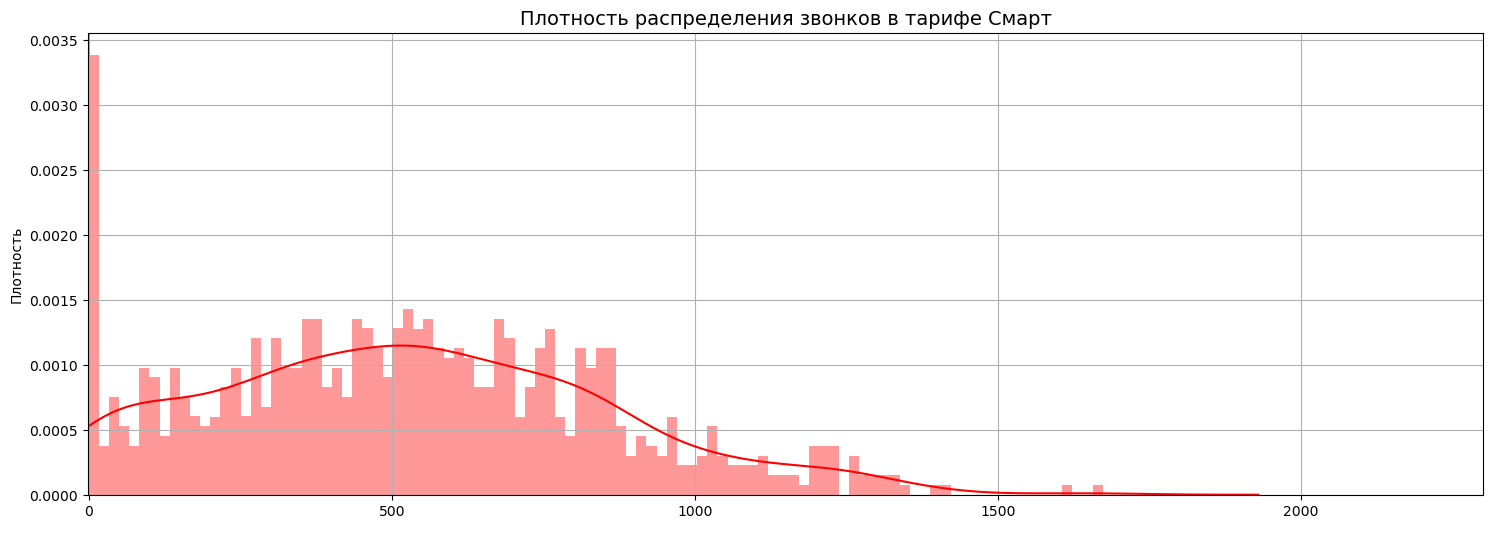

In [405]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(tariff_ultra_test['calls_duration'], bins=100, color="r")
plt.title('Плотность распределения звонков в тарифе Смарт', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-1, 2300);

####  Сообщения: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [253]:
#медиана
smart_messages_median = tariff_smart['messages_count'].median()

#дисперсия по выборке
smart_variance_estimate_message = np.var(tariff_smart['messages_count'], ddof=1)

#стандартное отклонение по выборке
smart_standard_deviation_message = np.std(tariff_smart['messages_count'], ddof=1)

display('Среднее значение (медиана)', smart_messages_median)
display('Дисперсия по выборке', smart_variance_estimate_message)
display('Стандартное отклонение по выборке', smart_standard_deviation_message)

'Среднее значение (медиана)'

28.0

'Дисперсия по выборке'

796.8129584480083

'Стандартное отклонение по выборке'

28.22787555676141

In [254]:
tariff_smart['messages_count'].describe()

count   2,229.00
mean       33.38
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: messages_count, dtype: float64

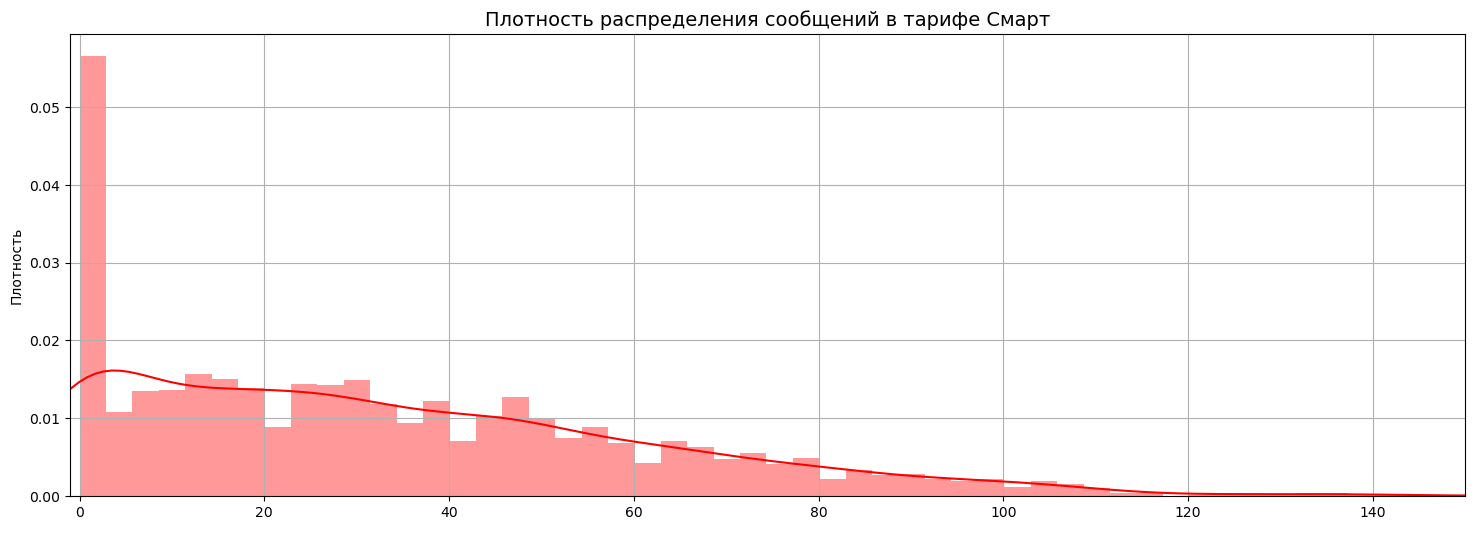

In [413]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(tariff_smart['messages_count'], bins=50, color="r")
plt.title('Плотность распределения сообщений в тарифе Смарт', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-1, 150);

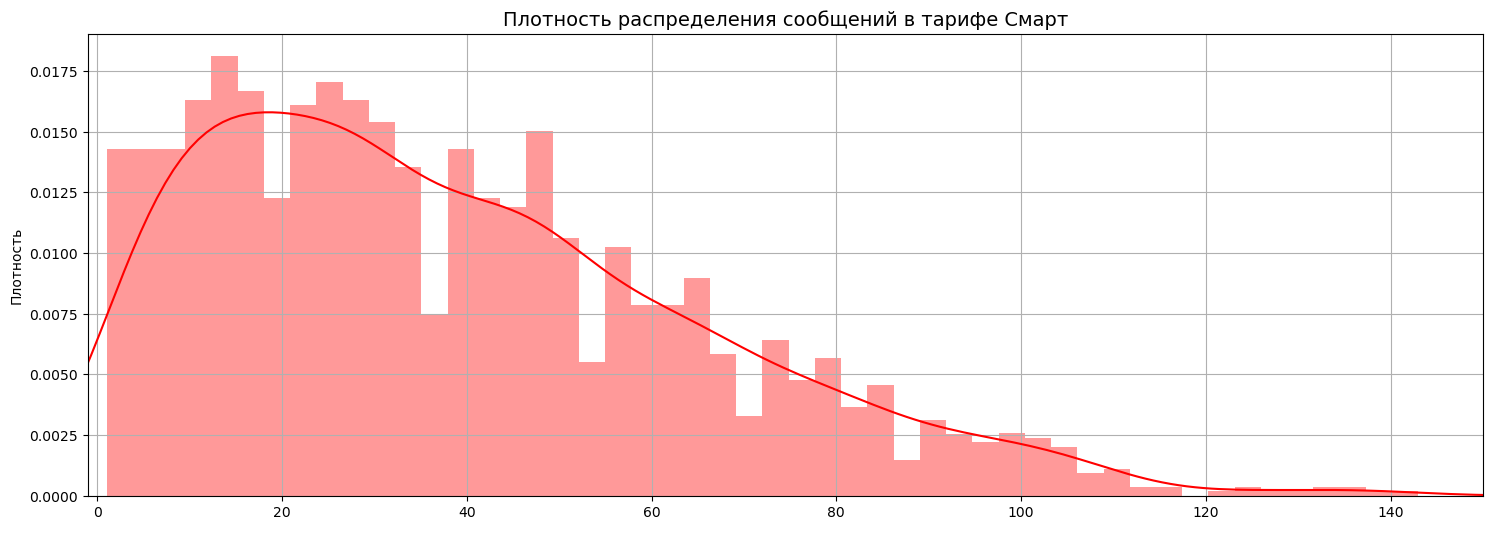

In [412]:
#исключаем нулевые значения
tariff_smart_test = tariff_smart.query('messages_count != 0.0')

plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(tariff_smart_test['messages_count'], bins=50, color="r")
plt.title('Плотность распределения сообщений в тарифе Смарт', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-1, 150);

####  Интернет-трафик: среднее количество, дисперсия и стандартное отклонение. Гистограммы.

In [257]:
#медиана
smart_internet_median = tariff_smart['GB_used'].median()

#дисперсия по выборке
smart_variance_estimate_internet = np.var(tariff_smart['GB_used'], ddof=1)

#стандартное отклонение по выборке
smart_standard_deviation_internet = np.std(tariff_smart['GB_used'], ddof=1)

display('Среднее значение (медиана)', smart_internet_median)
display('Дисперсия по выборке', smart_variance_estimate_internet)
display('Стандартное отклонение по выборке', smart_standard_deviation_internet)

'Среднее значение (медиана)'

43.0

'Дисперсия по выборке'

222.58832639089832

'Стандартное отклонение по выборке'

14.91939430375437

In [258]:
tariff_smart['GB_used'].describe()

count   2,228.00
mean       42.44
std        14.92
min         0.00
25%        34.00
50%        43.00
75%        52.00
max       101.00
Name: GB_used, dtype: float64

#### Выводы

Для тарифа smart (звонки):
- Среднее значение (медиана): 399.0
- Дисперсия по выборке: 32017.66
- Стандартное отклонение по выборке: 178.93
- Максимальное значение (минуты): 1355.00
Гистограмма: нормальное распределение с небольшим правым "хвостом"

Для тарифа smart (сообщения):
- Среднее значение (медиана): 28.0
- Дисперсия по выборке: 799.33
- Стандартное отклонение по выборке: 28.72
- Максимальное значение (количество сообщений): 143.00
Гистограмма: большое количество значений в районе нуля. После исключения нулей из данных для гистограммы получилось распределение с обрывом. Среднее значение гистограммы расположено сильно слева.

Для тарифа smart (интернет-трафик):
- Среднее значение (медиана): 17 Гб
- Дисперсия по выборке: 34.43
- Стандартное отклонение по выборке: 5.86
Гистограмма: нормальное распределение 

## Этап 4: Проверка гипотез

**Гипотезы:**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


#### Гипотеза №1:
Нулевая гипотеза: 
- H0 = средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

Альтернативная (двухсторонняя) гипотеза: 
- H1 = средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

In [260]:
profit_ultra = total_info.query('tariff == "ultra"')
profit_ultra = profit_ultra['total_profit']

profit_smart = total_info.query('tariff == "smart"')
profit_smart = profit_smart['total_profit']

In [261]:
alpha = .01

results_1 = st.ttest_ind(
    profit_smart, 
    profit_ultra,
    equal_var = False
)

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### Вывод к гипотезе №1

При определении критического уровня значимости берем во внимание объем выборки. В нашем случае рассматриваем 147 пользователей тарифа ultra против 350 тарифа smart. Выборки не слишком маленькие, но все равно объем данных не самый большой, поэтому есть вероятность получить ошибку первого рода. Чтобы этого избежать, лучше выбрать меньший уровень значимости (1%).

В результате мы получаем p-value меньше критического уровня значимости.

При таком уровне значимости нулевую гипотезу отвергаем, выручка с пользователей тарифов «Ультра» и «Смарт» различается. Однако, так как гипотеза двухсторонняя, мы не получаем ответ в большую или меньшую сторону. 

#### Гипотеза №2:
Нулевая гипотеза: 
- H0 =  средняя выручка пользователей из Москвы равна выручке от пользователей из других регионов.

Альтернативная (двухсторонняя) гипотеза: 
- H1 = средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [262]:
# Из выборки выделяем пользователей из Москвы и других регионов
# формируем датасеты для проверки гипотезы 

profit_Moscow = total_info.query('city == "Москва"')
profit_regions = total_info.query('city != "Москва"')

In [263]:
profit_Moscow['user_id'].nunique()

99

In [264]:
profit_regions['user_id'].nunique()

399

In [265]:
profit_Moscow = profit_Moscow['total_profit']
profit_regions = profit_regions['total_profit']

In [266]:
alpha = .01

results_2 = st.ttest_ind(
    profit_Moscow, 
    profit_regions,
    equal_var = False
)

print('p-значение: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


#### Вывод к гипотезе №2

При определении критического уровня значимости берем во внимание объем выборки. В нашем случае рассматриваем 99 пользователей из Москвы против 398 пользователей из других городов. Выборка по Москве маленькая, чтобы не получить ошибку первого рода, определим меньший уровень значимости (1%).

Полученное значение p-value говорит о том, что хотя выручка с московских клиентов и с клиентов из регионов неодинакова, с вероятностью почти в 52% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между выручками.

### Общие выводы

###  1. Тариф SMART 

#### Описание тарифа
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

#### Пользователи тарифа smart в среднем тратят в месяц:
- Около 399.0 минут на звонки,
- 28.0 сообщений,
- 17 Гб трафика.

Распределение по месяцам неравномерное:
- в мае и в период с августа по декабрь расходуют больше 400 минут в месяц (пик в декабре: 446.5 минут), а в январе самые низкие значения (в среднем 156.5 минут);
- с апреля по декабрь пользователи расходуют от 28 до 30 сообщений в месяц, больше всего в мае, сентябре и октябре. В январе в среднем всего 15 сообщений.
- с мая по декабрь расходуют в среднем около 16055.5 мегабайт трафика. С октября по декабрь самый большой расход - более 17000 мегабайт в месяц. А в январе всего 7097 мегабайт. 

#### Выручка с пользователей тарифа SMART
Средняя выручка с пользователей тарифа smart превышает абонентскую плату (на 84%) и для пользователей данной выборки составляет 933 руб. Средние (медиана) значения по минутам и звонкам укладываются в установленные тарифным планом нормы, а интернет-трафика пользователям не хватает, на примере данной выборки в среднем они тратят 17 гигабайт, а по тарифу включено 15 Гб.

Из 500 пользователей выборки 70% используют тариф smart, они приносят 57% выручки.

###  2. Тариф ULTRA 

#### Описание тарифа
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

#### Пользователи тарифа ULTRA в среднем тратят в месяц:
- 502.0 минут на звонки,
- 37.0 сообщений,
- 20.0 Гб трафика.

Распределение по месяцам неравномерное:
- в июле, октябре и декабрь расходуют больше 500 минут в месяц (пик в декабре: 558.5 минут), а в феврале самые низкие значения (в среднем 157 минут);
- с июля по декабрь пользователи расходуют от 39 до 52 сообщений в месяц, больше всего в октябре и декабре. Интересно, что с февраля по июнь расход сообщений у пользователей ultra меньше, чем у пользователей тарифа smart. Самые низкие показатели в феврале (всего 5 сообщений).
- с марта по декабрь колебания в целом незначительные. Самые низкие показатели в феврале, всего 7328 мегабайт.

Интересно, что в феврале у пользователей тарифа ultra по всем пунктам наблюдается низкие средние значения.

#### Выручка с пользователей тарифа ULTRA
Средняя выручка с пользователей тарифа не превышает абонентскую плату в 1950, так как пользователи редко перерасходуют лимит по тарифу. Более того, как видно по данным из выборки, в среднем траты пользователей ultra (минут, сообщений и гигабайтов) укладываются даже в тариф smart. 

Так как в выборке из 500 пользователей около 30% используют тариф ultra, то выглядит, что суммарная выручка с них ниже, чем с пользователей тарифа smart (около 43%).


# Дополнительные выводы к проекту

#### 1) Скорость подключения клиентов по городам (за 2018 год):
- быстрее всего в Москве (99 пользователей) и Санкт-Петербурге (39 пользователей), Новосибирске (16 пользователей), Казани (14 пользователей) и Омске (14 пользователей).

#### 2) Средняя длительность пользования тарифом ultra vs smart:

 По возрастной группе:
 - В молодой возрастной группе (от 18 до 44) в среднем меньше всего дней используют оба тарифа;
 - В среднем тариф smart дольше используют в средней возрастной группе (45-59 лет);
 - В среднем тариф ultra дольше используют в старческой возрастной группе;

 По городам:
 - Наименьшее среднее количество дней использования тарифа smart в Хабаровске, Томске, Чите и Москве. Наибольшее в Якутске и Новороссийске;
 - Наименьшее среднее количество дней использования тарифа ultra в Уфе и Череповце. Наибольшее в Туле;
 
####  3) Скорость оттока
- Количество клиентов, покинувших компанию за год, 38 пользователей;
- От использования тарифа smart отказались 23 пользователя против 15 отказавшихся от ultra;
- В процентном соотношении (от общего числа пользователей каждого тарифа) отток по тарифу ultra составляет 10%, в то время как от у smart 6%;
- Отток клиентов за пять месяцев с августа по декабрь, и больше всего отказавшихся в декабре 2018;
- Быстрее всего отток происходит в средней возрастной группе (от 45 до 59 лет);
- Более динамичный (регулярный) отток в молодой возрастной группе (от 18 до 44 лет), т.е. эти пользователи быстрее принимают решение об отказе от тарифа.

# Итог по выбору оптимального тарифа

По результатам исследования, наиболее оптимальным для пользователей выглядит тариф smart. 

В среднем, даже пользователи тарифа ultra по расходу минут и сообщений не превышают лимиты, определенные в smart. Т.е. пользователям ultra далеко не всегда требуется такое большое количество минут и сообщений. 
Кроме того, отток пользователей выше у тарифа ultra (10%).

Слабое место тарифа smart (с точки зрения пользователей) — это количество интернет-трафика. В тариф включен 15Гб, в то время как в среднем пользователи тратят 17Гб. А среди пользователей выборки у тарифа smart наибольшая доля относится к молодой возрастной группе (от 18 до 44 лет).